# Initialize

In [2]:
import os
import pandas as pd
import numpy as np
# import scipy
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
# import scanpy as sc
# import anndata as ad


In [3]:
path_proj_root = '/Users/curtismcginity/stanford/research/proj/MoTrPAC/dev/'
path_data = os.path.join(path_proj_root, 'data')
path_data_r6m = os.path.join(path_data, 'rat-6m')
path_contrast_time_txt = os.path.join(path_data_r6m, 'rat-acute-06_t68-liver_epigen-atac-seq_da_timewise-deseq2-phase-frip-t2f_v2.0.txt')
path_indv_tsv = p=os.path.join(path_data_r6m, 'motrpac_pass1ac-06_epigen-atac-seq_t68-liver_stanford_limma_norm.tsv')

In [7]:
# conver contrast time txt to polars
dftxt = pl.read_csv(path_contrast_time_txt, separator="\t")
# inspect header to ensure accuracy
print(dftxt.head(3))

shape: (3, 10)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬───────────┐
│ assay      ┆ feature_I ┆ tissue    ┆ contrast  ┆ … ┆ logFC     ┆ lfcSE    ┆ p_value  ┆ adj_p_val │
│ ---        ┆ D         ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---      ┆ ---      ┆ ue        │
│ str        ┆ ---       ┆ str       ┆ str       ┆   ┆ f64       ┆ f64      ┆ f64      ┆ ---       │
│            ┆ str       ┆           ┆           ┆   ┆           ┆          ┆          ┆ str       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪═══════════╡
│ epigen-ata ┆ chr1:1000 ┆ t68-liver ┆ acute_00. ┆ … ┆ 0.636047  ┆ 0.568352 ┆ 0.263094 ┆ NA        │
│ c-seq      ┆ 04215-100 ┆           ┆ 0h_IPE-co ┆   ┆           ┆          ┆          ┆           │
│            ┆ 004509    ┆           ┆ ntrol_00. ┆   ┆           ┆          ┆          ┆           │
│            ┆           ┆           ┆ 0h_IP…    ┆   ┆           ┆          

In [8]:
# convert indv tsv to polars
dfindv = pl.read_csv(path_indv_tsv, separator="\t")
# inspect header to ensure accuracy
print(dfindv.head(3))


shape: (3, 119)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Chr_Locat ┆ 900010168 ┆ 900050168 ┆ 900070168 ┆ … ┆ 908030168 ┆ 908070168 ┆ 908090168 ┆ 90810016 │
│ ion       ┆ 04        ┆ 04        ┆ 04        ┆   ┆ 04        ┆ 04        ┆ 04        ┆ 804      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ chr1:1000 ┆ 5.072018  ┆ 6.326373  ┆ 0.0       ┆ … ┆ 6.08771   ┆ 5.307832  ┆ 5.728953  ┆ 1.532331 │
│ 04215-100 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 004509    ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ chr1:1000 ┆ 5.072018  ┆ 1.807535  ┆ 9.399792  ┆ … ┆ 3.043855  ┆ 2.123133 

In [10]:
# export dfs to parquet with original names
ptxt = os.path.join(path_data_r6m, 'rat-acute-06_t68-liver_epigen-atac-seq_da_timewise-deseq2-phase-frip-t2f_v2.0.parquet')
pindv = os.path.join(path_data_r6m, 'motrpac_pass1ac-06_epigen-atac-seq_t68-liver_stanford_limma_norm.parquet')
dftxt.write_parquet(ptxt)
dfindv.write_parquet(pindv)


In [11]:
# clear memory
del dftxt, dfindv

## start here

In [23]:
ptxt = os.path.join(path_data_r6m, 'rat-acute-06_t68-liver_epigen-atac-seq_da_timewise-deseq2-phase-frip-t2f_v2.0.parquet')
pindv = os.path.join(path_data_r6m, 'motrpac_pass1ac-06_epigen-atac-seq_t68-liver_stanford_limma_norm.parquet')

# read in parquet files, filter for sex=male, then pass to pandas
dfplmale = pl.read_parquet(ptxt).filter(pl.col("sex") == "male")
dfmale = dfplmale.to_pandas()


# clear polars df from memory
del dfplmale

In [5]:
del dfmale

In [6]:
# read in parquet files, filter for sex=female, then pass to pandas
dfplfemale = pl.read_parquet(ptxt).filter(pl.col("sex") == "female")
dffemale = dfplfemale.to_pandas()

# clear polars df from memory
del dfplfemale

In [18]:
dfmale.head(7)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.636047,0.568352,0.263094,NA
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.037552,0.548057,0.945373,NA
2,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_01.0h-control_04.0h,01.0h,male,1.073052,0.626793,0.086902,NA
3,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_04.0h-control_04.0h,04.0h,male,1.438703,0.667616,0.031163,NA
4,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_07.0h-control_07.0h,07.0h,male,-0.544378,0.545802,0.318574,0.99999807787503
5,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_24.0h-control_00.0h,24.0h,male,0.151615,0.525375,0.772900,NA
6,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_48.0h-control_00.0h,48.0h,male,0.946096,0.459115,0.039332,NA


In [15]:
dfmale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209208 entries, 0 to 8209207
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   assay        object 
 1   feature_ID   object 
 2   tissue       object 
 3   contrast     object 
 4   timepoint    object 
 5   sex          object 
 6   logFC        float64
 7   lfcSE        float64
 8   p_value      float64
 9   adj_p_value  object 
dtypes: float64(3), object(7)
memory usage: 626.3+ MB


In [24]:
def standardize_data_types(df):
    """
    Standardize data types of the dataframe according to specified requirements.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to standardize
        
    Returns:
    --------
    pandas.DataFrame
        The dataframe with standardized data types
    """
    # Convert text columns to string type
    text_columns = ['assay', 'feature_ID', 'tissue', 'contrast', 'timepoint', 'sex']
    for col in text_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)
    
    # Convert float columns
    float_columns = ['logFC', 'lfcSE', 'p_value']
    for col in float_columns:
        if col in df.columns:
            df[col] = df[col].astype(float)
    
    # Handle adj_p_value column - convert 'NA' to 1.0
    if 'adj_p_value' in df.columns:
        # Replace 'NA' with 1.0
        df['adj_p_value'] = df['adj_p_value'].replace('NA', 1.0)
        # Convert to float
        df['adj_p_value'] = df['adj_p_value'].astype(float)
    
    return df

dfmale = standardize_data_types(dfmale)
dfmale.info()

# female
# dffemale = standardize_data_types(dffemale)
# dffemale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209208 entries, 0 to 8209207
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   assay        object 
 1   feature_ID   object 
 2   tissue       object 
 3   contrast     object 
 4   timepoint    object 
 5   sex          object 
 6   logFC        float64
 7   lfcSE        float64
 8   p_value      float64
 9   adj_p_value  float64
dtypes: float64(4), object(6)
memory usage: 626.3+ MB


In [25]:
dfmale.head(9)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.636047,0.568352,0.263094,1.000000
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.037552,0.548057,0.945373,1.000000
2,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_01.0h-control_04.0h,01.0h,male,1.073052,0.626793,0.086902,1.000000
3,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_04.0h-control_04.0h,04.0h,male,1.438703,0.667616,0.031163,1.000000
4,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_07.0h-control_07.0h,07.0h,male,-0.544378,0.545802,0.318574,0.999998
5,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_24.0h-control_00.0h,24.0h,male,0.151615,0.525375,0.772900,1.000000
6,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_48.0h-control_00.0h,48.0h,male,0.946096,0.459115,0.039332,1.000000
7,epigen-atac-seq,chr1:100005933-100006133,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,male,0.554128,0.842281,0.510609,1.000000
8,epigen-atac-seq,chr1:100005933-100006133,t68-liver,acute_00.5h-control_00.5h,00.5h,male,-0.202798,0.718402,0.777721,1.000000


In [8]:
# TOTAL HACK DO NOT REPEAT THIS
dfmale = dffemale.copy()

del dffemale

In [51]:
# check the memory usage of dataframes using f strings
print(f"dfmale memory usage: {dfmale.memory_usage().sum() / 1024**2:.2f} MB")
# print(f"dffemale memory usage: {dffemale.memory_usage().sum() / 1024**2:.2f} MB")


dfmale memory usage: 688.94 MB


Total number of feature_ID groups: 1172744
Number of significant feature_ID groups: 118931
Percentage of significant groups: 10.14%

Distribution of significant adj_p_values:


count    1.794300e+05
mean     3.113268e-01
std      1.367146e-01
min      4.402026e-19
25%      2.117271e-01
50%      3.375308e-01
75%      4.278911e-01
max      4.999935e-01
Name: adj_p_value, dtype: float64

/Users/curtismcginity/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


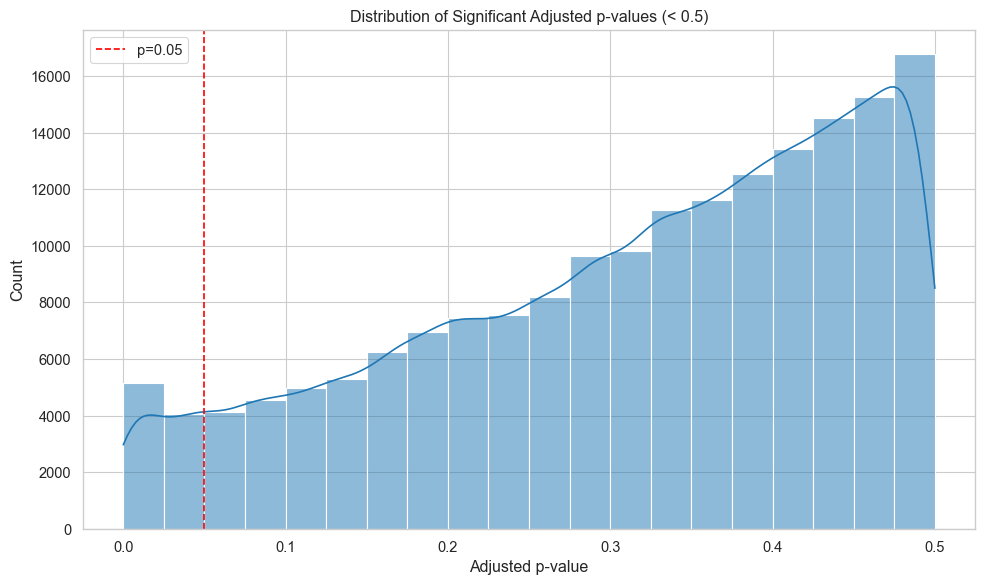

In [25]:
# Count total number of feature_ID groups
total_groups = dfmale['feature_ID'].nunique()
print(f"Total number of feature_ID groups: {total_groups}")

sig_thresh = 0.5
# Add significance indicator to each row
dfmale['is_significant'] = (dfmale
    .groupby('feature_ID')['adj_p_value']
    .transform(lambda x: np.min(x) < sig_thresh)
    .astype(int)
)

# Filter to keep only significant groups
dfmale_sig = dfmale[dfmale['is_significant'] == 1]

# Count significant groups and calculate percentage
sig_groups = dfmale_sig['feature_ID'].nunique()
sig_percentage = (sig_groups / total_groups) * 100

print(f"Number of significant feature_ID groups: {sig_groups}")
print(f"Percentage of significant groups: {sig_percentage:.2f}%")

# Analyze distribution of significant adj_p_values
print("\nDistribution of significant adj_p_values:")
sig_pvals = (dfmale_sig
    .loc[dfmale_sig['adj_p_value'] < sig_thresh, 'adj_p_value']
)
display(sig_pvals.describe())

# Plot histogram of significant adj_p_values
plt.figure(figsize=(10, 6))
sns.histplot(sig_pvals, bins=20, kde=True)
plt.title(f'Distribution of Significant Adjusted p-values (< {sig_thresh})')
plt.xlabel('Adjusted p-value')
plt.ylabel('Count')
plt.axvline(x=0.05, color='red', linestyle='--', label='p=0.05')
plt.legend()
plt.tight_layout()
plt.show()



Total number of feature_ID groups: 1172744
Number of significant feature_ID groups: 8249
Percentage of significant groups: 0.70%

Distribution of significant adj_p_values:


count    9.203000e+03
mean     2.219709e-02
std      1.601770e-02
min      4.402026e-19
25%      6.878446e-03
50%      2.126628e-02
75%      3.671778e-02
max      4.998766e-02
Name: adj_p_value, dtype: float64

/Users/curtismcginity/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


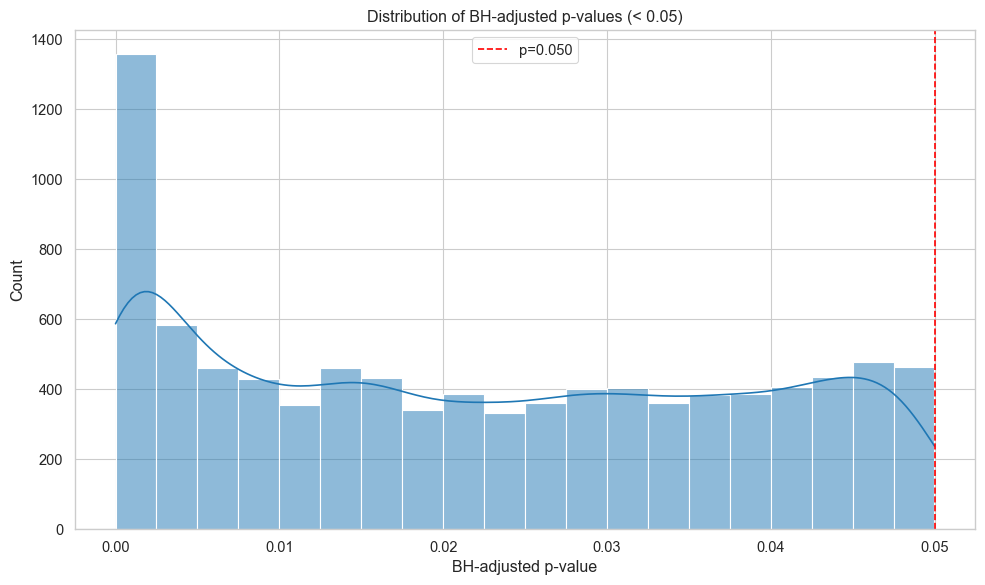

In [26]:
# Count total number of feature_ID groups
total_groups = dfmale['feature_ID'].nunique()
print(f"Total number of feature_ID groups: {total_groups}")

thresh = 0.05

# Add significance indicator to each row
dfmale['is_significant'] = (dfmale
    .groupby('feature_ID')['adj_p_value']
    .transform(lambda x: np.min(x) < thresh)
    .astype(int)
)

# Filter to keep only significant groups
dfmale_sig = dfmale[dfmale['is_significant'] == 1]

# Count significant groups and calculate percentage
sig_groups = dfmale_sig['feature_ID'].nunique()
sig_percentage = (sig_groups / total_groups) * 100

print(f"Number of significant feature_ID groups: {sig_groups}")
print(f"Percentage of significant groups: {sig_percentage:.2f}%")

# Analyze distribution of significant adj_p_values
print("\nDistribution of significant adj_p_values:")
sig_pvals = (dfmale_sig
    .loc[dfmale_sig['adj_p_value'] < thresh, 'adj_p_value']
)
display(sig_pvals.describe())

# Plot histogram of significant adj_p_values
plt.figure(figsize=(10, 6))
sns.histplot(sig_pvals, bins=20, kde=True)
plt.title(f'Distribution of BH-adjusted p-values (< {thresh})')
plt.xlabel('BH-adjusted p-value')
plt.ylabel('Count')
plt.axvline(x=thresh, color='red', linestyle='--', label=f'p={thresh:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

# Analyze

## prelim

In [42]:
dfmale.head(2)

,assay,feature_ID,tissue,contrast,timepoint,sex,logFC,lfcSE,p_value,adj_p_value,is_significant
0,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.0h_IPE-control_00.0h_IPE,00.0h_IPE,female,0.400034,0.660023,0.544455,1.0,0
1,epigen-atac-seq,chr1:100004215-100004509,t68-liver,acute_00.5h-control_00.5h,00.5h,female,-0.145988,0.550593,0.790896,1.0,0


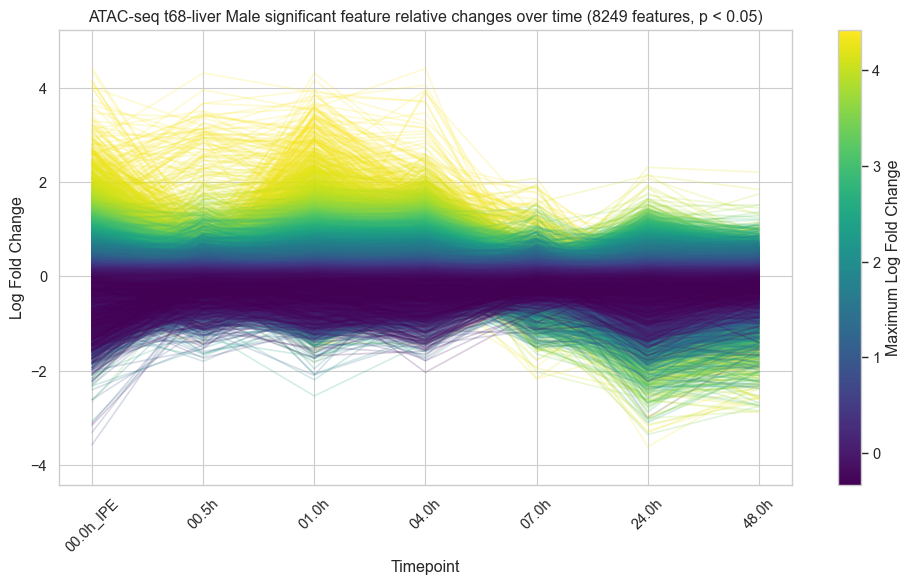

In [27]:
# Add a color bar legend
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colorbar as cbar

# Set seaborn style for professional scientific plots
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Assuming dfmale_sig is already filtered to significant groups
# Get the assay and tissue values (assuming they're consistent in the dataset)
assay_name = dfmale_sig['assay'].iloc[0]
tissue_name = dfmale_sig['tissue'].iloc[0]

# Get unique timepoints and sort them (these will be our x-axis)
timepoints = sorted(dfmale_sig['timepoint'].unique())

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Calculate maximum logFC for each feature_ID
max_logfc_by_feature = (dfmale_sig
    .groupby('feature_ID')['logFC']
    .max()
    .sort_values(ascending=False)
)

# Create a color palette based on the sorted maximum logFC values
# Using a sequential colormap from seaborn (can be changed to preference)
palette = sns.color_palette("viridis", n_colors=len(max_logfc_by_feature))

# Plot each feature_ID as a separate line with color based on max logFC
for i, (feature_id, max_val) in enumerate(max_logfc_by_feature.items()):
    # Get data for this feature
    group = (dfmale_sig
        .loc[dfmale_sig['feature_ID'] == feature_id]
        .sort_values('timepoint')
    )
    
    # Plot the line with transparency and color from palette
    plt.plot(group['timepoint'], group['logFC'], alpha=0.2, color=palette[len(palette) - 1 - i])

# Set the x-axis labels to be the timepoints
plt.xticks(range(len(timepoints)), timepoints, rotation=45)

# Calculate y-axis range with 10% padding
y_min = dfmale_sig['logFC'].min()
y_max = dfmale_sig['logFC'].max()
y_range = y_max - y_min
y_padding = 0.1 * y_range
plt.ylim(y_min - y_padding, y_max + y_padding)

# Set labels and title
plt.xlabel('Timepoint')
plt.ylabel('Log Fold Change')
plt.title(f"ATAC-seq {tissue_name} Male significant feature relative changes over time ({sig_groups} features, p < {thresh})")

# Create a ScalarMappable for the colorbar
norm = Normalize(vmin=max_logfc_by_feature.min(), vmax=max_logfc_by_feature.max())
sm = ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar
cax = plt.colorbar(sm, ax=plt.gca())
cax.set_label('Maximum Log Fold Change')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## c-means clustering

In [28]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any, Tuple


def classification_entropy(membership_matrix: np.ndarray) -> float:
    """Calculate entropy of fuzzy membership matrix: -1/n * sum_i sum_j (u_ij * log(u_ij))"""
    epsilon = np.finfo(float).eps
    u = np.clip(membership_matrix, epsilon, 1.0)
    n = membership_matrix.shape[1]
    return -1.0 / n * np.sum(u * np.log(u))


def xie_beni_index(data: np.ndarray, centers: np.ndarray, 
                  membership_matrix: np.ndarray, m: float) -> float:
    """Calculate Xie-Beni index: ratio of within-cluster compactness to between-cluster separation"""
    n = data.shape[0]  # Number of data points
    c = centers.shape[0]  # Number of clusters
    
    # Calculate compactness (numerator)
    u_power_m = membership_matrix ** m
    
    # Calculate squared distances between data points and centers
    squared_distances = np.zeros_like(membership_matrix)
    for j in range(c):
        squared_distances[j, :] = np.sum((data - centers[j, :]) ** 2, axis=1)
    
    compactness = np.sum(u_power_m * squared_distances)
    
    # Calculate separation (minimum distance between centers)
    if c > 1:
        # Explicitly calculate pairwise distances without using the inf trick
        min_dist_sq = float('inf')
        for i in range(c):
            for j in range(c):
                if i != j:  # Don't compare a center to itself
                    dist_sq = np.sum((centers[i] - centers[j]) ** 2)
                    min_dist_sq = min(min_dist_sq, dist_sq)
        
        # Guard against potential division by zero
        if min_dist_sq > 0:
            return compactness / (n * min_dist_sq)
        else:
            return float('inf')  # Centers are identical
    else:
        return float('inf')  # Only one cluster


def preprocess_data_for_clustering(df: pd.DataFrame) -> Tuple[np.ndarray, list, list]:
    """Transform dataframe into format for clustering: each feature_ID becomes a row with 7 timepoint values"""
    # Get unique timepoints and sort them
    timepoints = sorted(df['timepoint'].unique())
    
    # Create a pivot table: rows=feature_ID, columns=timepoint, values=logFC
    pivot_df = df.pivot_table(
        index='feature_ID', 
        columns='timepoint', 
        values='logFC',
        aggfunc='first'
    )
    
    pivot_df = pivot_df[timepoints]
    feature_ids = pivot_df.index.tolist()
    data = pivot_df.values
    
    return data, feature_ids, timepoints


def cmeans_clustering(
    df: pd.DataFrame,
    n_clusters: int = 2,
    fuzziness: float = 2.0,
    error: float = 0.001,
    max_iter: int = 100,
    random_seed: int = None
) -> Dict[str, Any]:
    """
    Cluster feature_IDs based on their logFC patterns across timepoints.
    Each feature_ID becomes one sample with 7 dimensions (timepoints).
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataframe containing feature_ID, timepoint, and logFC columns
    n_clusters : int, default=2
        Number of clusters to form
    fuzziness : float, default=2.0
        Fuzziness parameter m where m > 1
    error : float, default=0.001
        Stopping criterion for convergence
    max_iter : int, default=100
        Maximum number of iterations
    random_seed : int, default=None
        Random seed for initialization. If None, a random value will be generated.
        
    Returns:
    --------
    Dict containing clustering results and parameters
    """
    # Preprocess data: each row is a feature_ID, each column a timepoint
    data, feature_ids, timepoints = preprocess_data_for_clustering(df)
    # Transpose data for skfuzzy (expects shape: features, samples)
    data_t = data.T
    
    # Handle random seed
    if random_seed is None:
        random_seed = np.random.randint(0, 10000)
    print(f"Using random seed: {random_seed}")
    # Set the random seed for numpy
    np.random.seed(random_seed)
    
    # Perform fuzzy c-means clustering
    cntr, u, _, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=data_t,
        c=n_clusters,
        m=fuzziness,
        error=error,
        maxiter=max_iter,
        init=None
    )
    
    # Determine hard cluster assignments based on maximum membership
    cluster_assignments = np.argmax(u, axis=0)
    
    # Calculate metrics
    ce = classification_entropy(u)
    xbi = xie_beni_index(data, cntr, u, fuzziness)
    
    return {
        'centers': cntr,
        'membership': u,
        'cluster_assignments': cluster_assignments,
        'classification_entropy': ce,
        'xie_beni_index': xbi,
        'feature_ids': feature_ids,
        'timepoints': timepoints,
        'fpc': fpc,
        'random_seed': random_seed
    }


def plot_cluster_centroids(
    clustering_result: Dict[str, Any],
    df: pd.DataFrame,
    show_features: bool = True,
    feature_alpha: float = 0.1
):
    """
    Plot cluster centroids as line plots with optional feature patterns.
    
    Parameters:
    -----------
    clustering_result : Dict
        Output from cmeans_clustering function
    df : pd.DataFrame
        Original dataframe with feature_ID, timepoint, and logFC
    show_features : bool, default=True
        Whether to show individual feature patterns within clusters
    feature_alpha : float, default=0.1
        Transparency for feature lines
    """
    # Set seaborn style for professional scientific plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    
    # Extract key components from clustering result
    centers = clustering_result['centers']
    timepoints = clustering_result['timepoints']
    feature_ids = clustering_result['feature_ids']
    cluster_assignments = clustering_result['cluster_assignments']
    n_clusters = centers.shape[0]
    
    # Create color palette for clusters
    colors = sns.color_palette("tab10", n_clusters)
    
    # Create figure
    # plt.figure(figsize=(12, 8))
    plt.figure(figsize=(10, 6))
    
    # First plot individual feature patterns if requested
    if show_features:
        # Create mapping from feature_id to cluster
        feature_to_cluster = {fid: c for fid, c in zip(feature_ids, cluster_assignments)}
        
        # Plot each feature's pattern
        for feature_id, group in df.groupby('feature_ID'):
            if feature_id in feature_to_cluster:  # Skip if not in clustering results
                cluster = feature_to_cluster[feature_id]
                group_sorted = group.sort_values('timepoint')
                plt.plot(
                    group_sorted['timepoint'], 
                    group_sorted['logFC'], 
                    color=colors[cluster], 
                    alpha=feature_alpha,
                    linewidth=0.8
                )
    
    # Plot cluster centroids (thick lines)
    for i in range(n_clusters):
        plt.plot(
            timepoints, 
            centers[i], 
            color=colors[i], 
            linewidth=3, 
            label=f'Cluster {i+1}'
        )
    
    # Add labels and legend
    plt.xlabel('Timepoint')
    plt.ylabel('Log Fold Change')
    plt.title(f'Cluster Centroids (n={n_clusters})')
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def plot_only_centroids(
    clustering_result: Dict[str, Any]
):
    """
    Plot only the cluster centroids as line plots.
    
    Parameters:
    -----------
    clustering_result : Dict
        Output from cmeans_clustering function
    """
    # Set seaborn style for professional scientific plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    
    # Extract key components from clustering result
    centers = clustering_result['centers']
    timepoints = clustering_result['timepoints']
    n_clusters = centers.shape[0]
    
    # Create color palette for clusters
    colors = sns.color_palette("tab10", n_clusters)
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot cluster centroids (thick lines)
    for i in range(n_clusters):
        plt.plot(
            timepoints, 
            centers[i], 
            color=colors[i], 
            linewidth=3, 
            label=f'Cluster {i+1}'
        )
    
    # Add labels and legend
    plt.xlabel('Timepoint')
    plt.ylabel('Log Fold Change')
    plt.title(f'Cluster Centroids (n={n_clusters})')
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def find_optimal_clusters(
    df: pd.DataFrame,
    cluster_range: range = range(2, 7),
    fuzziness: float = 2.0
) -> Dict[str, Any]:
    """Find optimal number of clusters by evaluating metrics across cluster counts"""
    metrics = []
    all_results = {}
    
    for n in cluster_range:
        print(f"Clustering with {n} clusters...")
        result = cmeans_clustering(df, n_clusters=n, fuzziness=fuzziness)
        
        metrics.append({
            'n_clusters': n,
            'classification_entropy': result['classification_entropy'],
            'xie_beni_index': result['xie_beni_index'],
            'fpc': result['fpc']
        })
        
        all_results[n] = result
    
    metrics_df = pd.DataFrame(metrics)
    
    # Create metric plots for determining optimal clusters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(metrics_df['n_clusters'], metrics_df['xie_beni_index'], 'o-')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Xie-Beni Index')
    ax1.set_title('Xie-Beni Index vs. Number of Clusters')
    
    ax2.plot(metrics_df['n_clusters'], metrics_df['fpc'], 'o-')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Fuzzy Partition Coefficient')
    ax2.set_title('FPC vs. Number of Clusters')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'metrics': metrics_df,
        'all_results': all_results
    }

### quick test

/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)


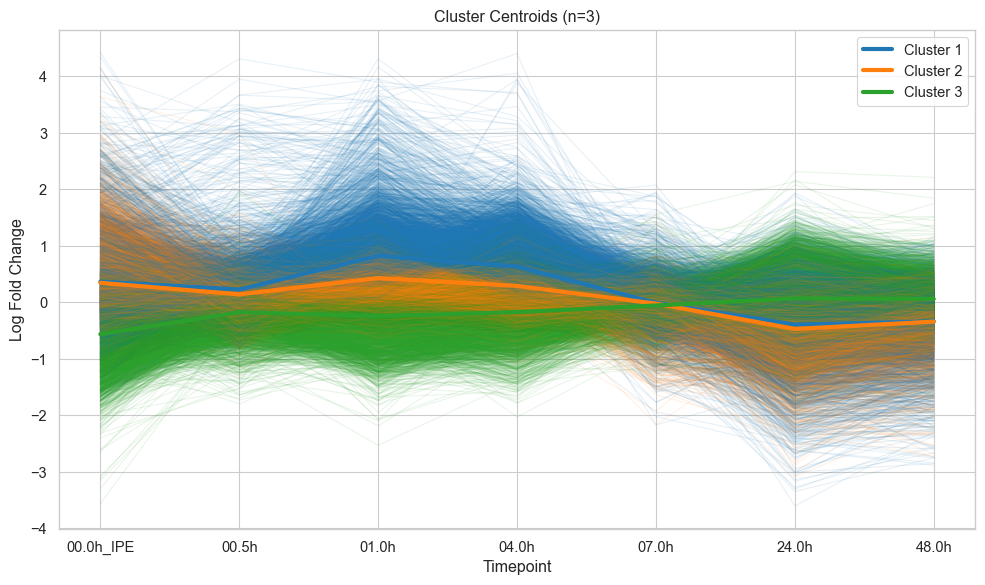

Clustering with 2 clusters...
Clustering with 3 clusters...
Clustering with 4 clusters...


/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)
/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)
/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)


Clustering with 5 clusters...
Clustering with 6 clusters...


/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)
/var/folders/yw/915p5y5n2z78t9tdv03lfh3r0000gq/T/ipykernel_58352/1990691424.py:34: RuntimeWarning: invalid value encountered in multiply
  np.eye(centers.shape[0]) * np.inf)


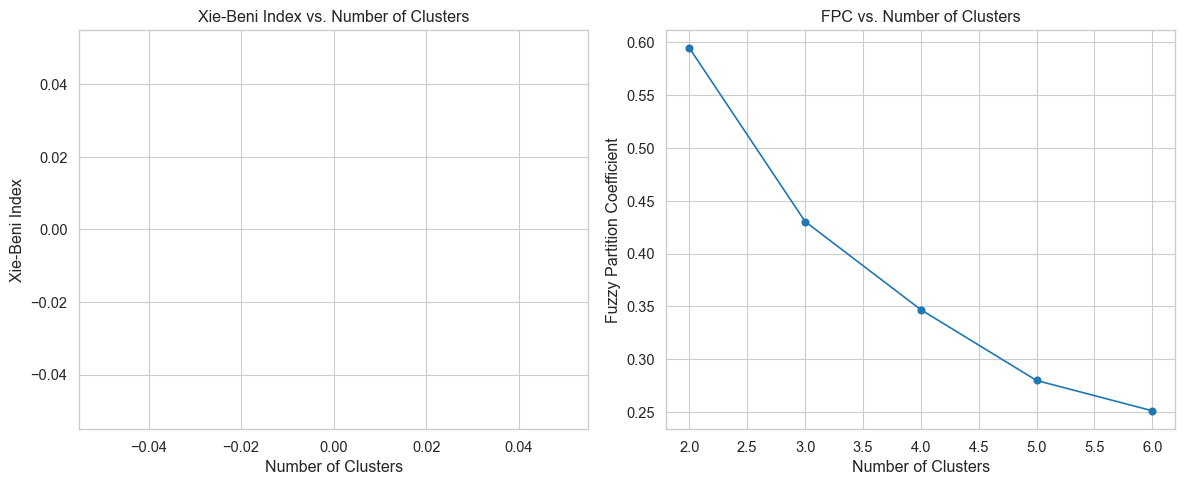

In [14]:
# Single clustering with 3 clusters
results = cmeans_clustering(dfmale_sig, n_clusters=3)
plot_cluster_centroids(results, dfmale_sig)

# Find optimal number of clusters
optimal = find_optimal_clusters(dfmale_sig)

### full run

In [31]:
def plot_cluster_centroids(
    clustering_result: Dict[str, Any],
    df: pd.DataFrame,
    show_features: bool = True,
    feature_alpha: float = 0.15,
    palette: str = "viridis"
):
    """
    Plot cluster centroids as line plots with optional feature patterns.
    
    Parameters:
    -----------
    clustering_result : Dict
        Output from cmeans_clustering function
    df : pd.DataFrame
        Original dataframe with feature_ID, timepoint, and logFC
    show_features : bool, default=True
        Whether to show individual feature patterns within clusters
    feature_alpha : float, default=0.2
        Transparency for feature lines
    palette : str, default="viridis"
        Color palette to use for clusters
    """
    # Set seaborn style for professional scientific plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    
    # Extract key components from clustering result
    centers = clustering_result['centers']
    timepoints = clustering_result['timepoints']
    feature_ids = clustering_result['feature_ids']
    cluster_assignments = clustering_result['cluster_assignments']
    n_clusters = centers.shape[0]
    
    # Create color palette for clusters
    colors = sns.color_palette(palette, n_clusters)
    
    # Get assay and tissue name for title
    assay_name = df['assay'].iloc[0] if 'assay' in df.columns else ''
    tissue_name = df['tissue'].iloc[0] if 'tissue' in df.columns else ''
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Calculate y-axis range
    all_logfc = df['logFC'].values
    y_min, y_max = all_logfc.min(), all_logfc.max()
    y_range = y_max - y_min
    y_limits = [y_min - 0.1 * y_range, y_max + 0.1 * y_range]
    
    # First plot individual feature patterns if requested
    if show_features:
        feature_to_cluster = {fid: c for fid, c in zip(feature_ids, cluster_assignments)}
        
        for feature_id, group in df.groupby('feature_ID'):
            if feature_id in feature_to_cluster:
                cluster = feature_to_cluster[feature_id]
                group_sorted = group.sort_values('timepoint')
                plt.plot(
                    group_sorted['timepoint'], 
                    group_sorted['logFC'], 
                    color=colors[cluster], 
                    alpha=feature_alpha,
                    linewidth=0.8
                )
    
    # Plot cluster centroids (thick lines)
    for i in range(n_clusters):
        plt.plot(
            timepoints, 
            centers[i], 
            color=colors[i], 
            linewidth=3, 
            label=f'Cluster {i+1}'
        )
    
    # Set x-ticks to timepoints with rotation
    plt.xticks(range(len(timepoints)), timepoints, rotation=45)
    
    # Set y-axis limits
    plt.ylim(y_limits)
    
    # Add labels and legend
    plt.xlabel('Timepoint')
    plt.ylabel('Log Fold Change')
    plt.title(f'{assay_name} {tissue_name} Male Cluster Centroids (n={n_clusters})')
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def plot_only_centroids(
    clustering_result: Dict[str, Any],
    df: pd.DataFrame,
    palette: str = "viridis"
):
    """
    Plot only the cluster centroids as line plots.
    
    Parameters:
    -----------
    clustering_result : Dict
        Output from cmeans_clustering function
    df : pd.DataFrame
        Original dataframe with feature_ID, timepoint, and logFC
    palette : str, default="viridis"
        Color palette to use for clusters
    """
    # Set seaborn style for professional scientific plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    
    # Extract key components from clustering result
    centers = clustering_result['centers']
    timepoints = clustering_result['timepoints']
    n_clusters = centers.shape[0]
    
    # Create color palette for clusters
    colors = sns.color_palette(palette, n_clusters)
    
    # Get assay and tissue name for title
    assay_name = df['assay'].iloc[0] if 'assay' in df.columns else ''
    tissue_name = df['tissue'].iloc[0] if 'tissue' in df.columns else ''
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Calculate y-axis range for centers only
    center_min = centers.min()
    center_max = centers.max()
    y_range = center_max - center_min
    y_limits = [center_min - 0.1 * y_range, center_max + 0.1 * y_range]
    
    # Plot cluster centroids (thick lines)
    for i in range(n_clusters):
        plt.plot(
            timepoints, 
            centers[i], 
            color=colors[i], 
            linewidth=3, 
            label=f'Cluster {i+1}'
        )
    
    # Set x-ticks to timepoints with rotation
    plt.xticks(range(len(timepoints)), timepoints, rotation=45)
    
    # Set y-axis limits
    plt.ylim(y_limits)
    
    # Add labels and legend
    plt.xlabel('Timepoint')
    plt.ylabel('Log Fold Change')
    plt.title(f'{assay_name} {tissue_name} Male Cluster Centroids (n={n_clusters})')
    plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def plot_individual_clusters(
    clustering_result: Dict[str, Any],
    df: pd.DataFrame,
    feature_alpha: float = 0.15,
    palette: str = "viridis"
):
    """
    Create individual plots for each cluster.
    
    Parameters:
    -----------
    clustering_result : Dict
        Output from cmeans_clustering function
    df : pd.DataFrame
        Original dataframe with feature_ID, timepoint, and logFC
    feature_alpha : float, default=0.3
        Transparency for feature lines
    palette : str, default="viridis"
        Color palette to use for clusters
    """
    # Set seaborn style for professional scientific plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    
    # Extract key components from clustering result
    centers = clustering_result['centers']
    timepoints = clustering_result['timepoints']
    feature_ids = clustering_result['feature_ids']
    cluster_assignments = clustering_result['cluster_assignments']
    n_clusters = centers.shape[0]
    
    # Create color palette for clusters
    colors = sns.color_palette(palette, n_clusters)
    
    # Get assay and tissue name for title
    assay_name = df['assay'].iloc[0] if 'assay' in df.columns else ''
    tissue_name = df['tissue'].iloc[0] if 'tissue' in df.columns else ''
    
    # Calculate y-axis range for consistency across plots
    all_logfc = df['logFC'].values
    y_min, y_max = all_logfc.min(), all_logfc.max()
    y_range = y_max - y_min
    y_limits = [y_min - 0.1 * y_range, y_max + 0.1 * y_range]
    
    # Create mapping from feature_id to cluster
    feature_to_cluster = {fid: c for fid, c in zip(feature_ids, cluster_assignments)}
    
    # Create one plot for each cluster
    for cluster_idx in range(n_clusters):
        plt.figure(figsize=(10, 6))
        
        # First plot the individual features in this cluster
        for feature_id, group in df.groupby('feature_ID'):
            if feature_id in feature_to_cluster and feature_to_cluster[feature_id] == cluster_idx:
                group_sorted = group.sort_values('timepoint')
                plt.plot(
                    group_sorted['timepoint'], 
                    group_sorted['logFC'], 
                    color=colors[cluster_idx], 
                    alpha=feature_alpha,
                    linewidth=0.8
                )
        
        # Then plot the centroid
        plt.plot(
            timepoints, 
            centers[cluster_idx], 
            color=colors[cluster_idx], 
            linewidth=3, 
            label=f'Cluster {cluster_idx+1} Centroid'
        )
        
        # Count features in this cluster
        n_features = sum(1 for c in cluster_assignments if c == cluster_idx)
        
        # Set x-ticks to timepoints with rotation
        plt.xticks(range(len(timepoints)), timepoints, rotation=45)
        
        # Set y-axis limits
        plt.ylim(y_limits)
        
        # Add labels and legend
        plt.xlabel('Timepoint')
        plt.ylabel('Log Fold Change')
        plt.title(f'{assay_name} {tissue_name} Male - Cluster {cluster_idx+1} ({n_features} features)')
        plt.legend()
        
        # Adjust layout
        plt.tight_layout()
        plt.show()

Using random seed: 9620


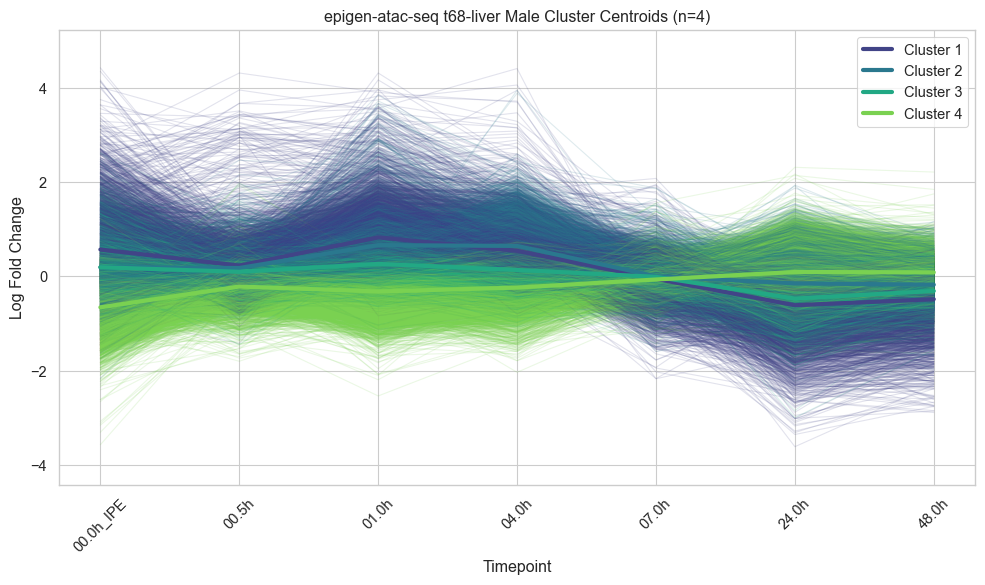

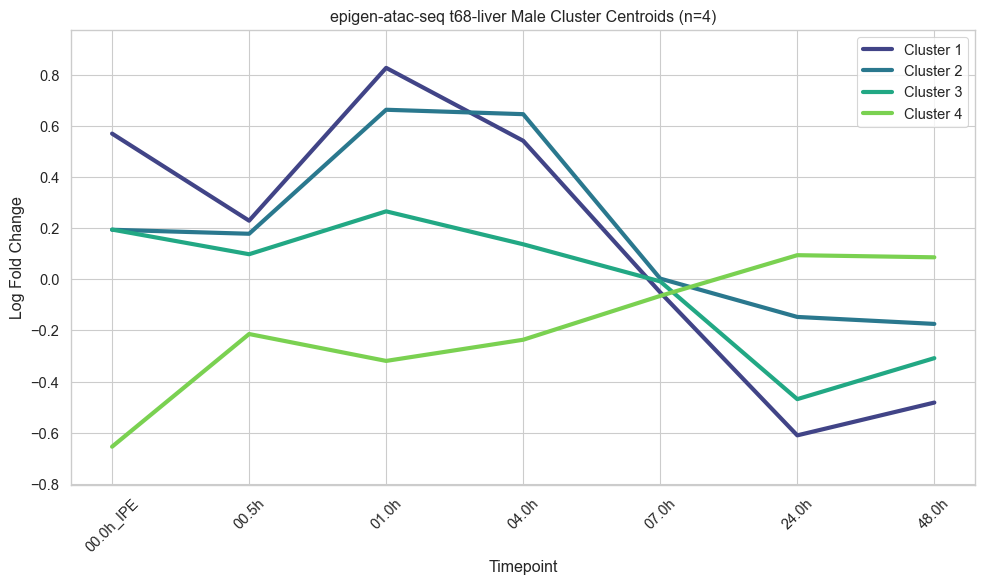

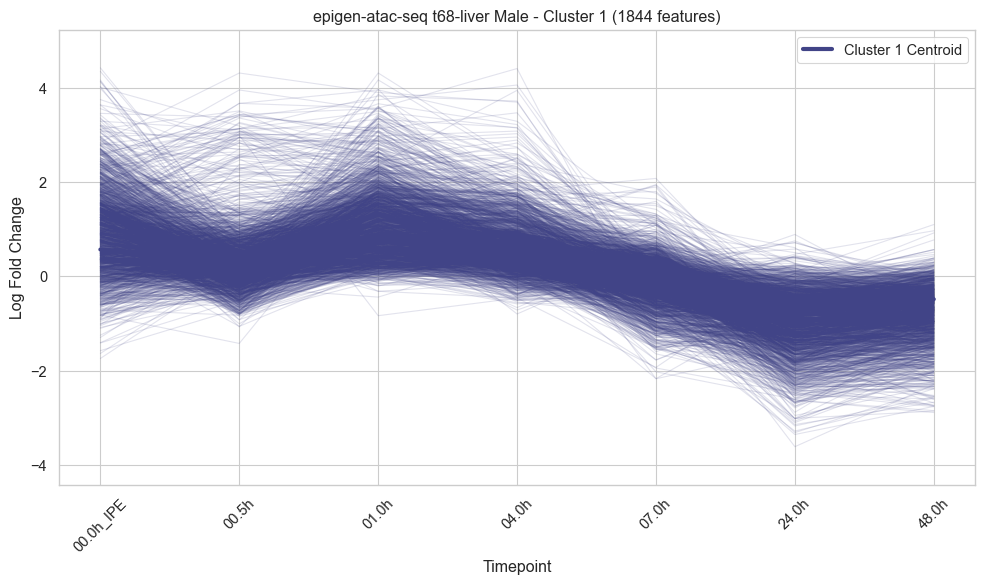

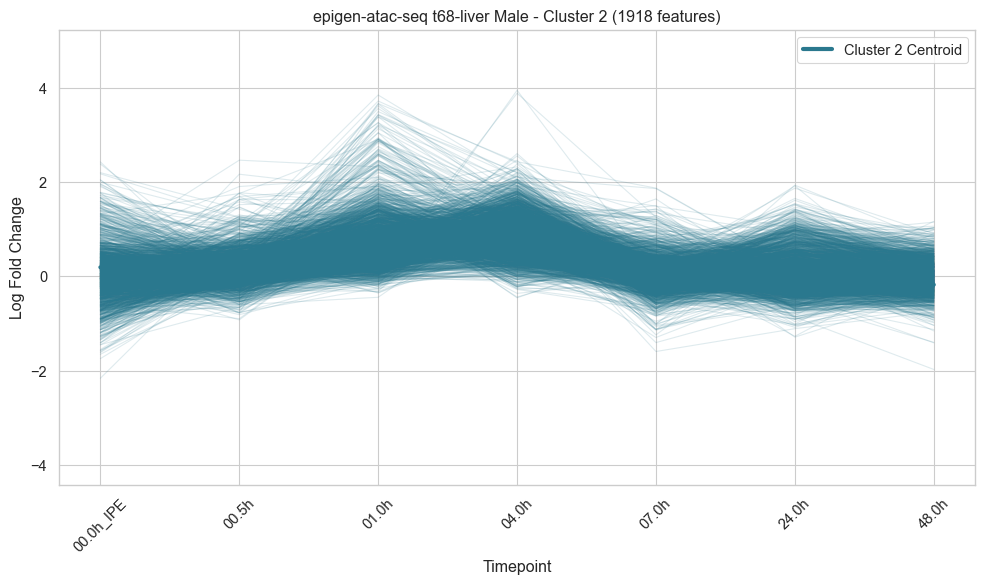

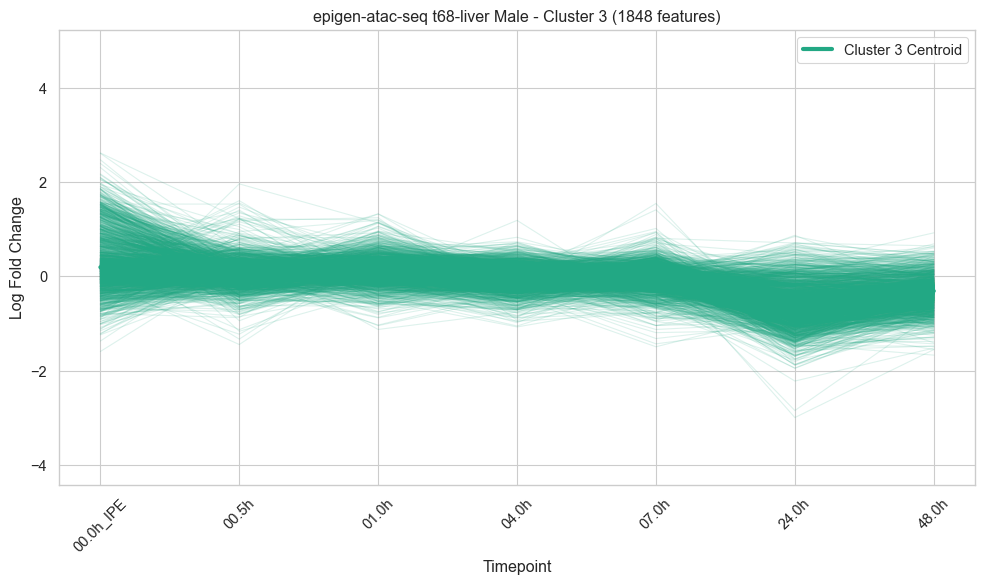

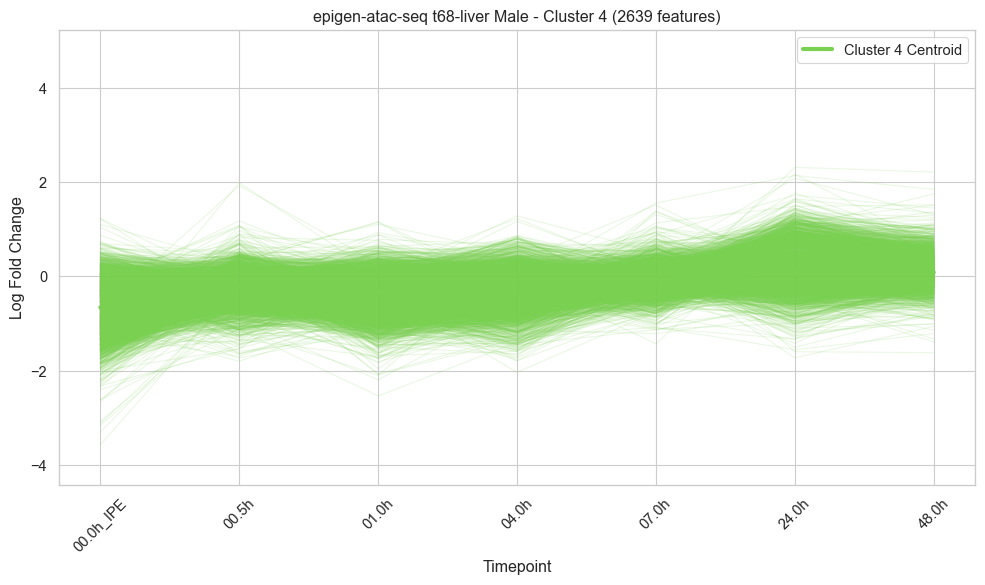

Clustering with 2 clusters...
Using random seed: 5110
Clustering with 3 clusters...
Using random seed: 6978
Clustering with 4 clusters...
Using random seed: 2832
Clustering with 5 clusters...
Using random seed: 4135
Clustering with 6 clusters...
Using random seed: 118


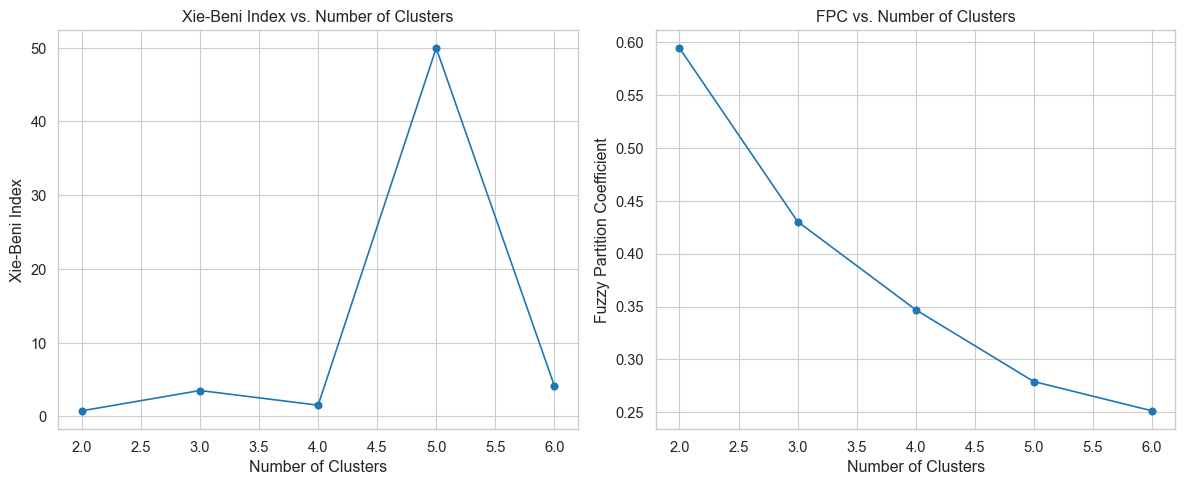

Optimal number of clusters based on Xie-Beni Index: 2


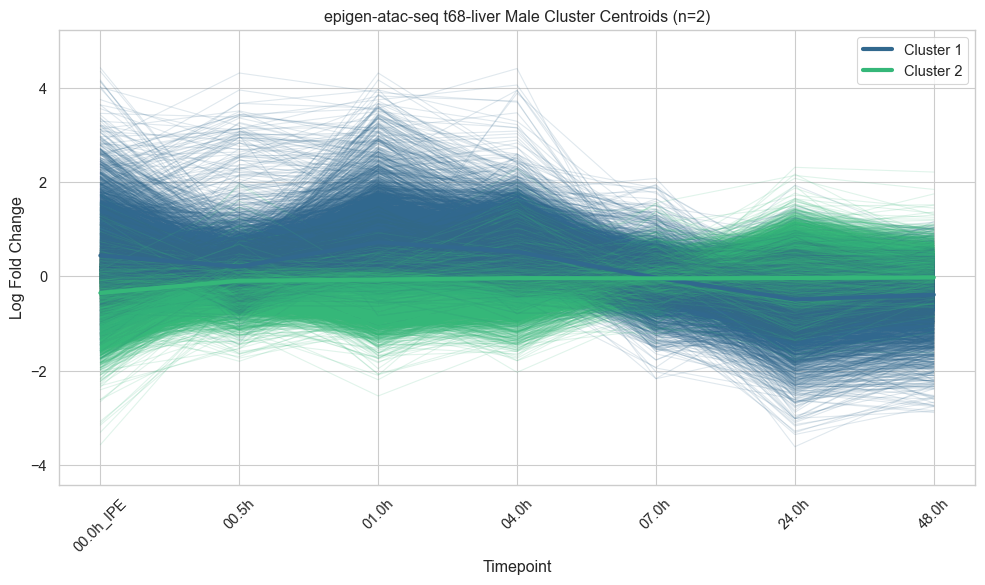

In [32]:
seed_male = 9620

# Step 1: Run clustering with 3 clusters
results = cmeans_clustering(dfmale_sig, n_clusters=4, random_seed=9620)

# Step 2: Plot all clusters together
plot_cluster_centroids(results, dfmale_sig)

plot_only_centroids(results, dfmale_sig)

# Step 3: Plot each cluster individually
plot_individual_clusters(results, dfmale_sig)

# Step 4: Find optimal number of clusters
optimal_results = find_optimal_clusters(dfmale_sig, cluster_range=range(2, 7))

# Step 5: Use the optimal number of clusters (based on XBI)
best_n = optimal_results['metrics']['n_clusters'].iloc[
    optimal_results['metrics']['xie_beni_index'].idxmin()
]
print(f"Optimal number of clusters based on Xie-Beni Index: {best_n}")

# Step 6: Get the optimal clustering results
optimal_clustering = optimal_results['all_results'][best_n]

# Step 7: Plot the optimal clustering
plot_cluster_centroids(optimal_clustering, dfmale_sig)

# Visualize

# Scratch